# 1st Homework: Least Squares

* 1) Related with the nature of the data, which conditions should meet matrices $A$ and $b$ to be solvable from the least squares perspective.

* 2) Use a least squares for non-linear models adjust the bitcoin price and perform a prediction using the model to determine the future daily price a week ahead, compare with the actual values.

* 3) Use least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silved and gold, during the last year.

* 4) Solve the [point set registration problem](https://en.wikipedia.org/wiki/Point-set_registration). Hint (check: S. Umeyama, Least-Squares Estimation of Transformation Parameters Between Two Point Patterns, IEEE Trans. Pattern Anal. Mach. Intell., vol. 13, no. 4, 1991). Construct a GUI to test.



# Solution:

# 1) 
When considering a least squares problem, one encounters with the overdetermined system $Ax=b$, that is, $A_{m\times n}$ with $m>n$. We have that the first column of $A$ is a column of ones, and each of the other columns are constituted by the first components of the vectors of the data that we have to train, and ultimately $b$ is the vector of observations $Y_i$. The problem we try to solve is to find $\hat{x}$ that minimizes the error $e$ that appears on $A\hat{x}=b+e$. That is equivalent to solving the normal system $A^{T}A\hat{x}=A^{T}b$, or solving the system $R_{11}x=Q^{T}_1b$, where $Q_1R_{11}$ is the QR decomposition of $A$.<br>
In order for us to be able to find a solution ,we shall avoid 2 main situations: $b$ being orthogonal to the span of $A$, or the columns of $A$ being linearly dependent.<br>
The prior is not that common, since having $b$ orthogonal to the span of $A$ usually suggests we have a bad model(see https://www.cs.cornell.edu/~bindel/class/cs3220-s12/notes/lec11.pdf). On the other hand, having the columns of $A$ linearly dependent means $A^{T}A$ is singular, so we don't have a unique solution to the normal system $A^{T}A\hat{x}=A^{T}b$. So in order for us to be able to solve the system from the least squares perspective, we need the columns of A to be linearly independent. Also from a computational point of view, we should solve the QR system instead of the normal system, since the condition number of $A^{T}A$ is the square of the condition number of $A$.

# 2) 
We can use a polynomial approximation to fit the data with a least squares model, i.e., we want to minimize $\sum_i(p(x_i)-Y_i)$, where $p(x)$ is a polynomial of degree less than the size of the data. We can make use of the the Polynomials library to have an idea of what degree should we use in order to fit the data best.

In [33]:
using CSV 
using DataFrames
# we read the data from bitcoin for the month of February
dataBitcoin = CSV.read("Bitcoin.csv",DataFrame);               
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");  #we replace the comma that the data had in order to convert into float
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);

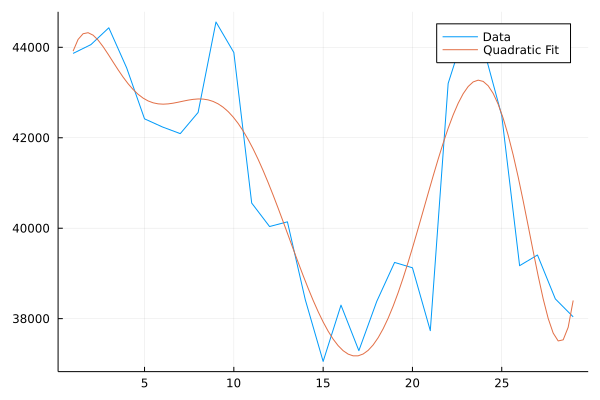

In [35]:
using Plots, Polynomials
l = size(dataBitcoin.PriceFloat,1);
xs = Array((1:l)) #we name the data
ys = dataBitcoin.PriceFloat
f = fit(xs, ys, 7) # we use the fit() to fit to a polynomial of degree 7 
plot(xs, ys, label = "Data")
plot!(f, extrema(xs)..., label = "Quadratic Fit") #we plot the curve and compare with the data


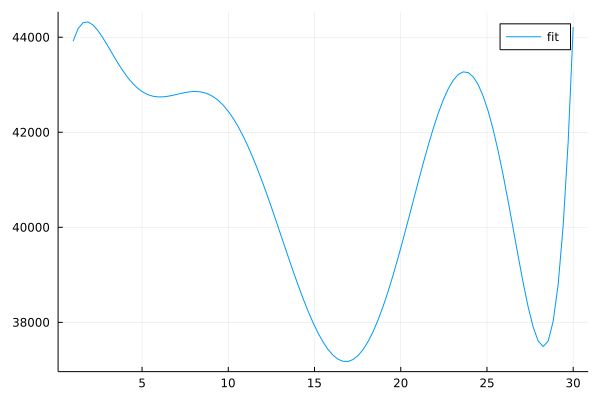

In [36]:
pr = Array((1:30)) #here we plot the fitted curve in the next days
plot(f, extrema(pr)..., label="fit")

We can see from the graph above that the model predicts that Bitcoin price would increase on the days following March 7th, and we know that indeed happened, if we look at the prices from February 7th to March 27th, we can see an increase on the prices:

In [37]:
using CSV
using DataFrames

dataBitcoinpr = CSV.read("Bitcoinpr.csv",DataFrame);               
dataBitcoinpr.Price .= replace.(dataBitcoinpr.Price, "," => "");  #we replace the comma that the data had in order to convert into float
dataBitcoinpr.PriceFloat = parse.(Float64, dataBitcoinpr.Price);

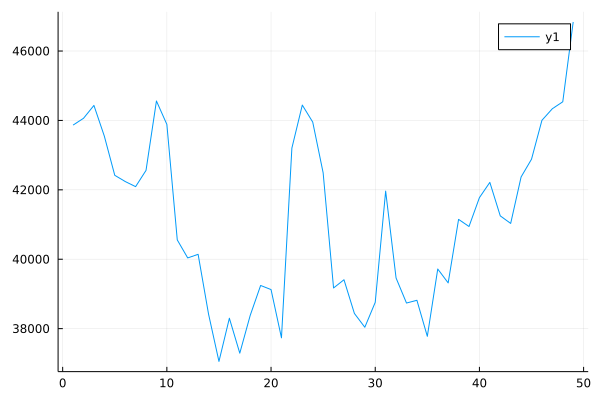

In [38]:
plot(dataBitcoinpr.PriceFloat)

So, ultimately, if we wan't to create a routine that uses least squares to fit a polynomial of degree 7, it would look something like this:

In [39]:
A_1 = ones(l,1); 
A_2 = Array((1:l)); #here each array corresponds to a column of the system Ax=b
A_3 = [a^2 for a in A_2];
A_4 = [a^3 for a in A_2];
A_5 = [a^4 for a in A_2];
A_6 = [a^5 for a in A_2];
A_7 = [a^6 for a in A_2];
A_8 = [a^7 for a in A_2];

b = Array(dataBitcoin.PriceFloat);

A = [A_1 A_2 A_3 A_4 A_5 A_6 A_7] # Define matrix A

xhat = A\b 

7-element Vector{Float64}:
 49168.56406489207
 -5662.962371879906
  1738.2634134613636
  -227.26017021039758
    13.713525753058716
    -0.3818260333917114
     0.00397679025103763

Now we wan't to compute the polynomial with the coefficients found with the model, so we do:

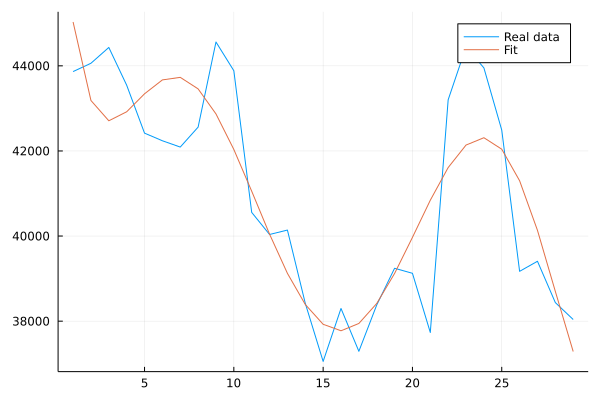

In [44]:
pred = Vector{Float64}(undef, l) # initialize the prediction vector
deg = size(xhat,1) # we wan't the degree of the polynomial

for i in 1:deg     # Construct the polynomial 
    pred += (xhat[i]*A[:,i])
end

plot(A[:,2],b, label="Real data")
plot!(A[:,2],pred, label="Fit")

# 3) 
We can use a linear least squares model to see what was the trend of the prices of Gold, Silver and Oil throughout 2021,training the model with the simoultaneous information of the three commodities, and then we can compare the results with the trends of the Bitcoin prices during 2021.

In [32]:
using CSV
using DataFrames

dataGold = CSV.read("Gold.csv",DataFrame);               
dataGold.Price .= replace.(dataGold.Price, "," => "");  #here we read the data from the commodities and parse into float
dataGold.PriceFloat = parse.(Float64, dataGold.Price);

In [33]:
dataSilver = CSV.read("Silver.csv",DataFrame); 

In [34]:
dataOil = CSV.read("Oil.csv",DataFrame);

In [35]:
dataGold.Price #here we sample the data

265-element Vector{String15}:
 "1901.60"
 "1969.40"
 "1977.60"
 "1932.30"
 "1935.50"
 "1856.90"
 "1872.30"
 "1865.10"
 "1875.40"
 "1871.90"
 "1849.10"
 "1809.75"
 "1836.60"
 ⋮
 "1800.70"
 "1807.30"
 "1796.90"
 "1791.10"
 "1804.60"
 "1814.00"
 "1810.10"
 "1811.10"
 "1813.30"
 "1808.20"
 "1816.60"
 "1831.00"

In [36]:
dataSilver.Price

311-element Vector{Float64}:
 26.525
 27.008
 27.584
 27.867
 27.27
 27.473
 24.845
 25.133
 25.478
 25.637
 25.768
 25.997
 25.054
  ⋮
 22.363
 22.275
 22.502
 22.792
 22.94
 22.91
 22.878
 22.979
 23.111
 22.848
 23.091
 23.381

In [37]:
dataOil.Price

263-element Vector{Float64}:
 47.62
 49.93
 50.63
 50.83
 52.24
 52.25
 53.21
 52.91
 53.57
 52.36
 52.2
 52.36
 52.98
  ⋮
 70.87
 72.38
 70.86
 68.23
 71.12
 72.76
 73.79
 75.57
 75.98
 76.56
 76.99
 75.21

Now we plot the 

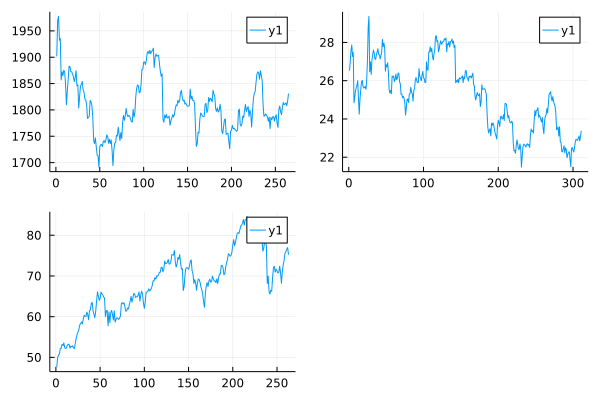

In [38]:
using Plots #we can plot the data to have a visual idea of the behaviour

p1=plot(dataGold.PriceFloat)
p2=plot(dataSilver.Price)
p3=plot(dataOil.Price)
plot!(p1,p2,p3)

In [39]:
N1 = size(dataGold.PriceFloat,1); #now we create the system Ax=b with the combined data of the commodities
A1 = Array((1:N1));
b1 = Array(dataGold.PriceFloat);
A1 = [ones(N1,1) A1];

N2 = size(dataSilver.Price,1);
A2 = Array((1:N2));
b2 = Array(dataSilver.Price);
A2 = [ones(N2,1) A2];

N3 = size(dataOil.Price,1);
A3 = Array((1:N3));
b3 = Array(dataOil.Price);
A3 = [ones(N3,1) A3];

A = [A1; A2; A3]
b = vcat(b1, b2, b3) #vector b is the combined array of the prices oserved throughout the year

839-element Vector{Float64}:
 1901.6
 1969.4
 1977.6
 1932.3
 1935.5
 1856.9
 1872.3
 1865.1
 1875.4
 1871.9
 1849.1
 1809.75
 1836.6
    ⋮
   70.87
   72.38
   70.86
   68.23
   71.12
   72.76
   73.79
   75.57
   75.98
   76.56
   76.99
   75.21

In [52]:
using LinearAlgebra #now we solve the system
xhat3 = A\b

2-element Vector{Float64}:
 702.6305987532178
  -0.714640954395786

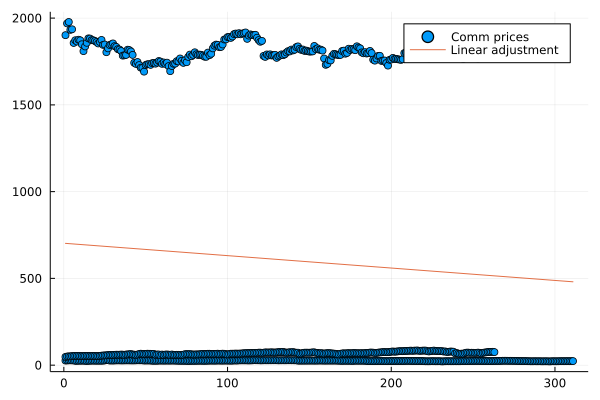

In [53]:
using Plots #here we plot the whole data and the linear fit of the data
N=839
xhat = xhat3

pred = xhat[2]*A[:,2] + xhat[1]*ones(N,1)
plot(A[:,2],b, seriestype = :scatter, label = "Comm prices")
plot!(A[:,2],pred, label = "Linear adjustment")


We can see that when mixing the three commodities, the model yields a line which has a negative slope, suggesting that the trend of the commodities combined in 2021 was to decrease. Now, if we see the prices of the bitcoin and ajust to it a linear model as well, we see that:

In [47]:
using CSV
using DataFrames

dataBitcoin2 = CSV.read("Bitcoin2.csv",DataFrame); #read Bitcoin prices in 2021               
dataBitcoin2.Price .= replace.(dataBitcoin2.Price, "," => ""); 
dataBitcoin2.PriceFloat = parse.(Float64, dataBitcoin2.Price);

In [48]:
N0 = size(dataBitcoin2.PriceFloat,1);#formulate the system Ax=b
A0 = Array((1:N0));
b0 = Array(dataBitcoin2.PriceFloat);
A0 = [ones(N0,1) A0];

In [49]:
using LinearAlgebra}#solve the system
xhat0 = A0\b0

2-element Vector{Float64}:
 42192.74454011738
    28.588103044496556

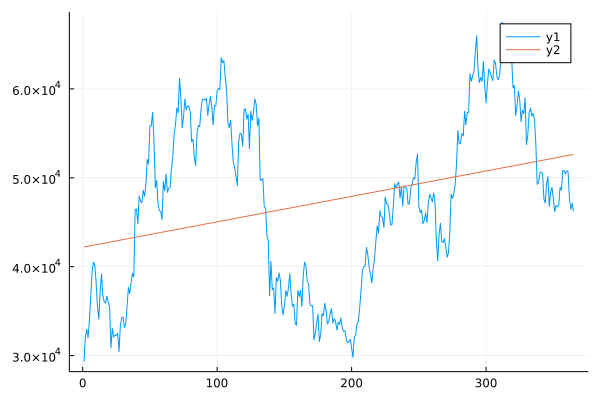

In [50]:
pred0 = xhat0[2]*A0[:,2] + xhat0[1]*ones(N0,1)#now we plor the prices and the linear fit to compare
plot(A0[:,2],b0)
plot!(A0[:,2],pred0)

We can see that the model yields a line of slope $\approx 28$, which, assuming is accurate, suggests an increasing trend during 2021, contrasting the trend we saw for the combined commodities, whose linear fit has a slope of $\approx -0.7$.<br>

We can also plot the linear predictions along with the data itself to ilustrate the contrast:

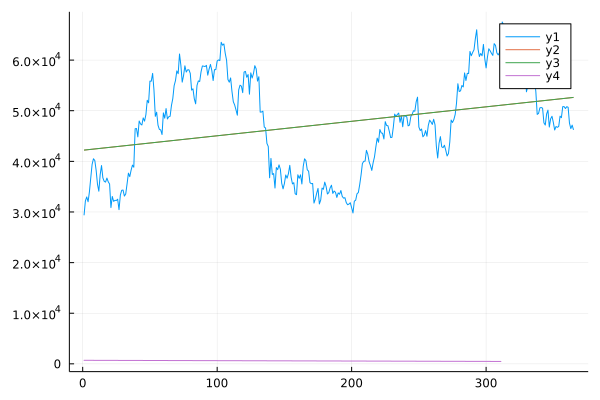

In [51]:
plot!(A0[:,2],pred0)
plot!(A[:,2],pred)

# 4) 
Statement of the problem: Given 2 sets of points in an $m$-dimensional space, we want to find the similarity transformation parameters $R,t,c$ such that they minimize the mean squared error, i.e., 

$$e^2(R,t,c)=\frac{1}{n}\sum_{i=1}^{n}(\|y_i-cRx_i+t\|^2)$$

is minimun. Umeyama showed (See: S. Umeyama, Least-Squares Estimation of Transformation Parameters Between Two Point Patterns, IEEE Trans. Pattern Anal. Mach. Intell., vol. 13, no. 4, 1991) that the parameters that minimize $e^2$ are given by $R=USV^{T},c=tr(DS)/\sigma^{2}_x, t=\mu_y-cR\mu_x$, where $UDV^{T}$ is a singular value decomposition of the covariant matrix of $X$ and $Y$, $\Sigma_{XY}$.
$$ \mu_z=\frac{1}{n}\sum_{i=1}^nz_i$$
$$ \sigma^2_z=\frac{1}{n}\sum_{i=1}^{n}\|z_i-\mu_z\|^2 $$
and $S=I$ if $det(\sum_{XY})\geq 0$ and $S=diag(1,1,...1,1-1)$ otherwise.<br>

We can implement the latter theorem in the following routine:

In [45]:
#Implementation: Least-Squares estimation of transformation parameters

function sigma(X,Y) #function that calculates Covariance matrix of X and Y
    dim = size(X[1],1)
    sum = zeros(Float64,dim,dim)
    n = size(X,1)
    for i in 1:n
        sum += ((Y[i]-mean(Y))*transpose((X[i]-mean(X))))
    end
    return (1/n)*sum
end

function varianceX(X) #function that calculates Variance around the mean vector of X
    dim = size(X[1],1)
    n = size(X,1)
    sum = 0
    for i in 1:n
        sum += norm(X[i]-mean(X))^2
    end
    return (1/n)*sum
end

function parameters(X,Y) # Given the sets of points X and Y, parameters(X,Y) returns parameters R,t and c for the trasnformation from X to Y
    dim = size(X[1],1)
    sigma_XY = sigma(X,Y)
    F = svd(sigma_XY)
    S = zeros(Float64,dim,dim)
    if det(sigma_XY)>=0
        S = Matrix(1.0I, dim, dim)
    else
        V = ones(Float64,dim)
        V[dim]=-1
        S = Diagonal(V)
    end
    R = F.U*S*F.Vt
    c = tr(Diagonal(F.S)*S)/(varianceX(X))
    t = mean(Y)-c*R*mean(X)
    return R,t,c
    
end

parameters (generic function with 1 method)

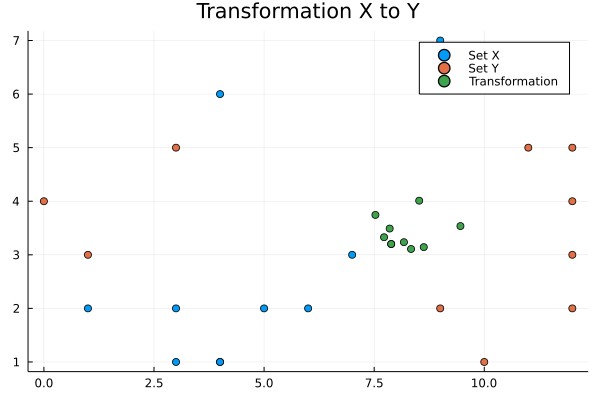

In [52]:
# Example 1: Sets of size 10
a_1 = [3;1];
a_2 = [5;2];
a_3 = [7;3];
a_4 = [1;2];
a_5 = [9;7];
a_6 = [4;1];
a_7 = [4;6];
a_8 = [3;2];
a_9 = [6;2];
a_10 = [4;1];
X = [a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,a_10];
b_1 = [9;2];
b_2 = [1;3];
b_3 = [0;4];
b_4 = [3;5];
b_5 = [11;5];
b_6 = [12;5];
b_7 = [12;4];
b_8 = [12;3];
b_9 = [12;2];
b_10 = [10;1];
Y = [b_1,b_2,b_3,b_4,b_5,b_6,b_7,b_8,b_9,b_10];

par = parameters(X,Y)
Z = [par[3]*par[1]*X[i]+par[2] for i in 1:size(X,1)] # Set of points resulting from the transformation from X to Y

fplotx_1 = [X[i][1] for i in 1:size(X,1)];
fploty_1 = [X[i][2] for i in 1:size(X,1)];
fplotx_2 = [Y[i][1] for i in 1:size(Y,1)];
fploty_2 = [Y[i][2] for i in 1:size(Y,1)];
fplotx_3 = [Z[i][1] for i in 1:size(Z,1)];
fploty_3 = [Z[i][2] for i in 1:size(Z,1)];
plot(fplotx_1,fploty_1, title = "Transformation X to Y",label = "Set X",seriestype = :scatter) # Deploy example_1
plot!(fplotx_2,fploty_2, label = "Set Y", seriestype = :scatter)
plot!(fplotx_3,fploty_3, label = "Transformation",seriestype = :scatter)